# `/app/amzn-titan/src/app/image_generator.py` のテスト実行用ノートブック

In [1]:
import sys
sys.path.append("/app/amzn-titan/src/app")

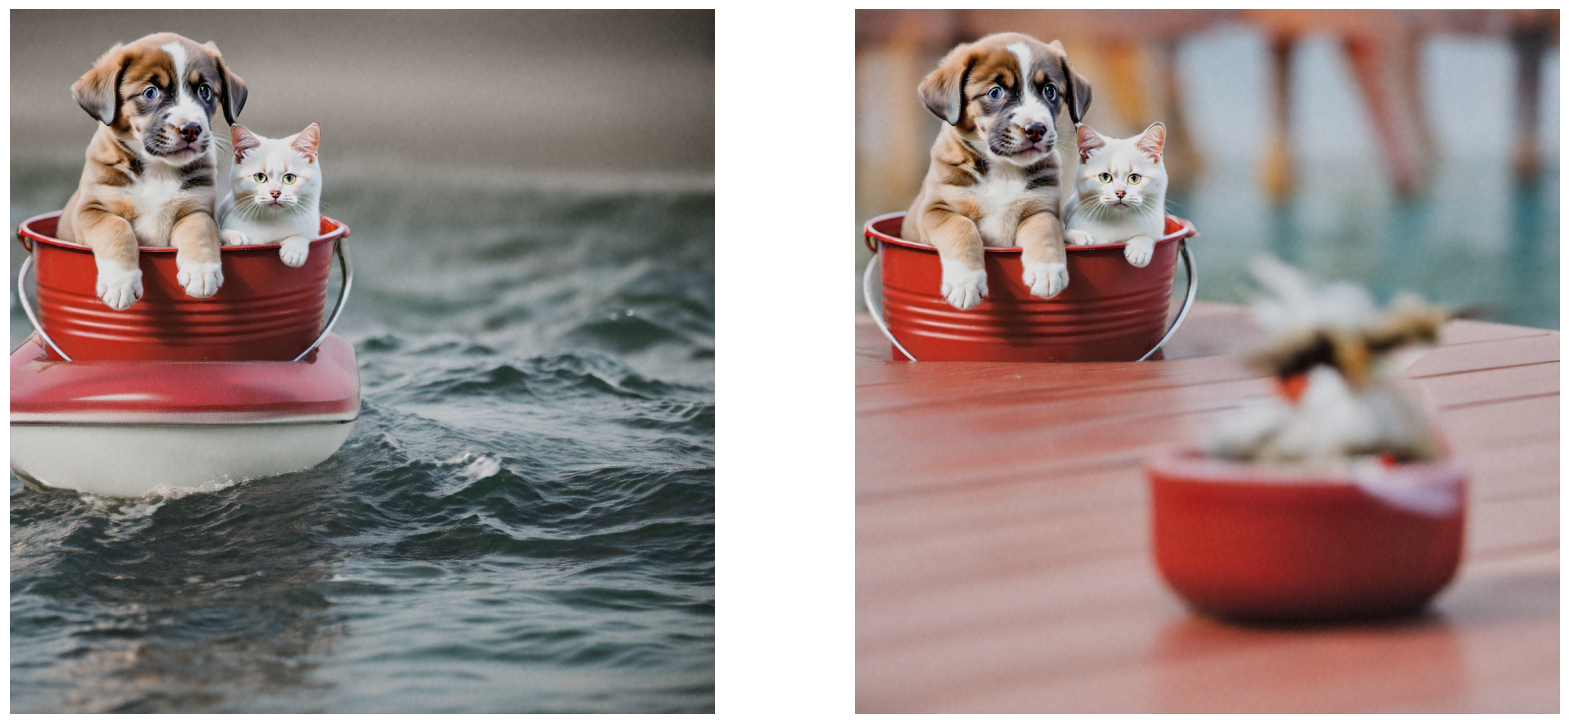

In [2]:
import utils as utils
from image_generator import ImageGenerator

REGION = "us-west-2"
MODEL_ID = "amazon.titan-image-generator-v2:0"


def main() -> None:
    input_image_path = "/app/amzn-titan/images/input/resized_dogcat.png"
    mask_image_path = "/app/amzn-titan/images/mask/resized_mask_combined.png"
    save_dir = "/app/amzn-titan/images/output"
    prompt = "ocean"
    negative_prompt = "bad quality, low res, noise"
    # mask_prompt = "A cute brown puppy"
    seed = 42
    num_image = 2

    img_generator = ImageGenerator(region=REGION)
    input_image = utils.read_image_as_base64(input_image_path)
    # input_images = [input_image]
    mask_image = utils.read_image_as_base64(mask_image_path)

    payload = img_generator.make_outpaint_payload(
        prompt=prompt,
        negative_prompt=negative_prompt,
        input_image=input_image,
        mask_image=mask_image,
        # mask_prompt=mask_prompt,
        outpainting_mode="PRECISE",
    )
    response = img_generator.generate_image(
        payload=payload, model_id=MODEL_ID, seed=seed, num_image=num_image
    )
    images = img_generator.extract_images_from(response)
    utils.save_images(save_dir, images, seed=seed)
    utils.show_images(images)


if __name__ == "__main__":
    main()